In [19]:
# Import required modules:
from time import sleep
import random
import pandas as pd
import re
import matplotlib.pyplot as plt # Matplotlib is a Python 2D plotting library and allows to make quality charts in few lines of code.
%matplotlib inline
import numpy as np #Numpy provides a large set of numeric datatypes that you can use to construct arrays.
import wget as wg
from textblob import TextBlob
from collections import Counter #It allow us to count words   
import folium #It allows us to make maps

# TWITTER

In [27]:
%store -r dfgiugno
dfgiugno.reset_index(inplace=True)
del dfgiugno['index']

In [28]:
dft=dfgiugno
dft

,Location,Username,Tweets_count,Followers_count,Following_count,Likes_count,Website,Lat,Lon,FollowersxTweet
0,"Paris, France",Paris,36503,2127671,2335,3414.0,paris.fr,48.856697,2.351462,58.287565
1,"Oslo, Norge",Oslokommune,2887,79790,35,292.0,oslo.kommune.no,59.913330,10.738970,27.637686
2,Amsterdam,AmsterdamNL,16680,407078,177,729.0,amsterdam.nl/coronavirus,52.374540,4.897976,24.405156
3,"Zürich, Schweiz",stadtzuerich,624,12048,37,114.0,stadt-zuerich.ch,47.372394,8.542333,19.307692
4,Stockholm,Stockholmsstad,7523,122812,594,788.0,start.stockholm,59.325117,18.071093,16.324870
5,Madrid. España,MADRID,44175,700342,122,2.0,diario.madrid.es,40.416705,-3.703582,15.853809
6,Roma,Roma,44885,472219,220,743.0,comune.roma.it,41.893320,12.482932,10.520642
7,"Warsaw, Poland",warszawa,29579,271990,168,13212.0,um.warszawa.pl,52.231958,21.006725,9.195375
8,Bruxelles,VilleBruxelles,8385,73291,152,2177.0,bruxelles.be,50.846557,4.351697,8.740727
9,"Lisboa, Portugal",CamaraLisboa,18279,96542,184,2883.0,lisboa.pt,38.707751,-9.136592,5.281580


In [29]:
result=dft
m = folium.Map(location=[50, 17], zoom_start=3)
for i in range(0,len(result)):
    folium.CircleMarker(
        [result.iloc[i]['Lat'], result.iloc[i]['Lon']], popup=(result.iloc[i]['Location'] +" "+ 
                                                               "has " +
                                                               str(result.iloc[i]['Followers_count']) +
                                                               " followers on Twitter"
                                                              ),
        radius=5,color="red",
        fill=True,
        fill_color="r"
    ).add_to(m)
m

Text(0, 0.5, 'Twitter Index: \n Followers per tweet')

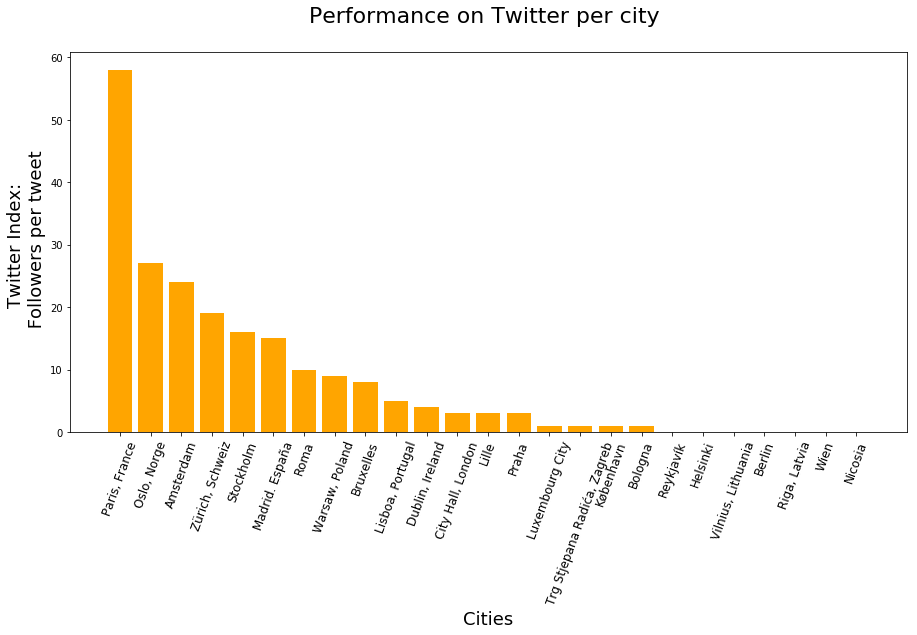

In [41]:
# Sort the df for the bar chart and transform str to int
result.sort_values(by=['FollowersxTweet'],ascending=False, inplace=True)
result["FollowersxTweet"]=result["FollowersxTweet"].map(int)
#create the bar chart
plt.figure(figsize=(15,7))    #figure size, size of the graph
plt.xticks(rotation = 70, size = 12)
plt.bar (x = result["Location"],
        height = result["FollowersxTweet"], color = 'orange')
plt.title('Performance on Twitter per city \n', size = 22)
plt.xlabel("Cities", size = 18)
plt.ylabel('Twitter Index: \n Followers per tweet', size = 18) 

## FACEBOOK

In [37]:
%store -r dff
dff

,City,Inscription,Followers,Likes,LikesxFollowers,FollowersxLikes,Mean,Years online,Fol+LikesxYear
8,Paris,17 dicembre 2009,2971850,3036443,1.021735,0.978727,1.511099,11,546208
17,Rome,11 settembre 2012,450432,444467,0.986757,1.013421,1.493467,8,111862
26,Lisbon,28 novembre 2011,426763,414883,0.972163,1.028635,1.486480,9,93516
16,Madrid,7 luglio 2015,179704,167048,0.929573,1.075763,1.467454,5,69350
1,Warsaw,28 dicembre 2009,260975,247325,0.947696,1.055191,1.475291,11,46209
31,Oslo,29 giugno 2016,55002,52215,0.949329,1.053375,1.476017,4,26804
30,London,17 febbraio 2014,72669,71124,0.978739,1.021723,1.489601,6,23965
11,Copenhagen,27 dicembre 2012,84155,81909,0.973311,1.027421,1.487021,8,20758
9,Bologna,2 luglio 2009,116548,110947,0.951943,1.050484,1.477184,11,20681
25,Vienna,1 aprile 2010,98277,93565,0.952054,1.050361,1.477234,10,19184


Text(0, 0.5, 'Facebook Index: \n Mean of Followers + Likes per Year')

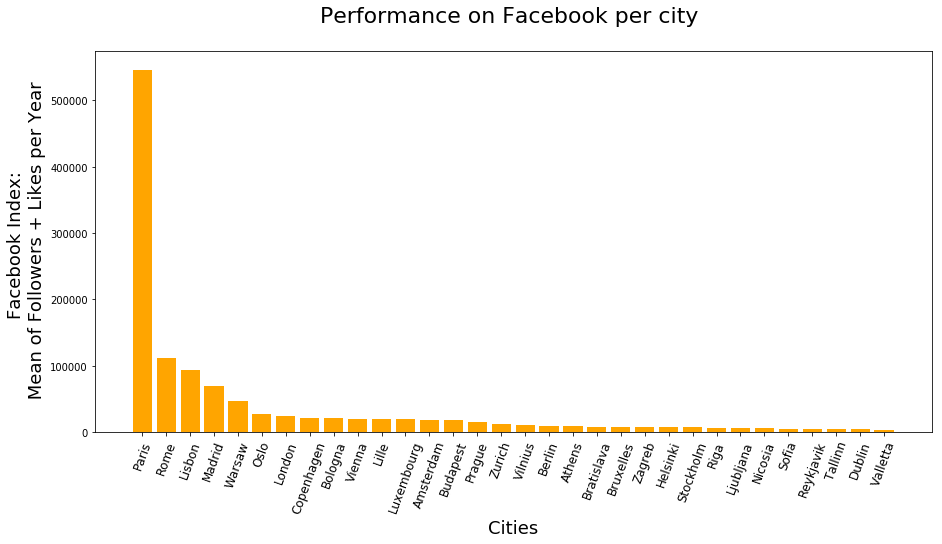

In [42]:
# Sort the df for the bar chart and transform str to int
dff.sort_values(by=['Fol+LikesxYear'],ascending=False, inplace=True)
dff["Fol+LikesxYear"]=dff["Fol+LikesxYear"].map(int)
#create the bar chart
plt.figure(figsize=(15,7))    #figure size, size of the graph
plt.xticks(rotation = 70, size = 12)
plt.bar (x = dff["City"],
        height = dff["Fol+LikesxYear"], color = 'orange')
plt.title('Performance on Facebook per city \n', size = 22)
plt.xlabel("Cities", size = 18)
plt.ylabel('Facebook Index: \n Mean of Followers + Likes per Year', size = 18) 

# YouTube

In [44]:
%store -r dfyt
dfyt

,City,Videos,Views,Subscribers,Inscription,ViewsxVideos,SubxVideos,Mean,Years online,MeanxYear
0,Stadt Wien,278,3674022,4470,2013-12-27T09:36:37Z,13215.906475,16.079137,6615.992806,8,826.999101
1,Ville de Luxembourg,164,905875,661,2012-01-05T10:36:23Z,5523.628049,4.030488,2763.829268,9,307.092141
2,Berlin.de,24,97622,204,2014-04-01T14:09:42Z,4067.583333,8.500000,2038.041667,7,291.148810
3,I amsterdam,396,2527229,4420,2010-02-18T21:35:50Z,6381.891414,11.161616,3196.526515,11,290.593320
4,Københavns Kommune,48,203591,1060,2012-04-25T15:26:39Z,4241.479167,22.083333,2131.781250,9,236.864583
5,Oslo kommune,25,37007,182,2017-05-04T13:00:19Z,1480.280000,7.280000,743.780000,4,185.945000
6,Helsingin kaupunki,356,725128,1210,2015-11-18T13:19:35Z,2036.876404,3.398876,1020.137640,6,170.022940
7,Mestna občina Ljubljana,206,520721,400,2013-09-06T06:46:03Z,2527.771845,1.941748,1264.856796,8,158.107100
8,Warszawa,3555,11799694,19200,2007-11-20T11:37:39Z,3319.182560,5.400844,1662.291702,14,118.735122
9,Tallinna Linnakantselei,193,509331,360,2009-05-18T09:34:56Z,2639.020725,1.865285,1320.443005,12,110.036917


Text(0, 0.5, 'YouTube Index: \n Mean of views and subscribers per video in a year')

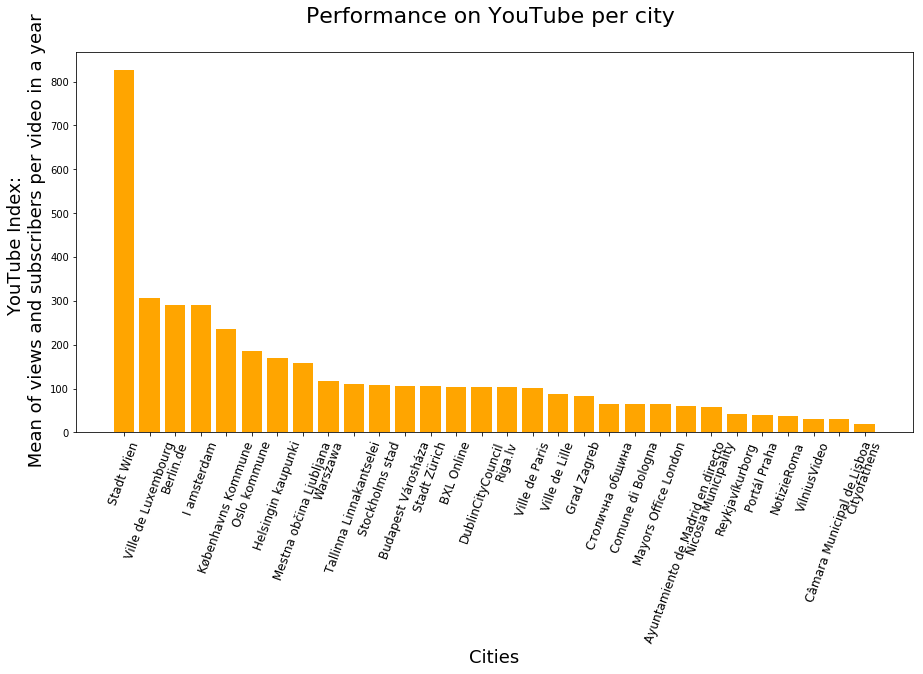

In [46]:
# Sort the df for the bar chart and transform str to int
dfyt.sort_values(by=['MeanxYear'],ascending=False, inplace=True)
dfyt["MeanxYear"]=dfyt["MeanxYear"].map(int)
#create the bar chart
plt.figure(figsize=(15,7))    #figure size, size of the graph
plt.xticks(rotation = 70, size = 12)
plt.bar (x = dfyt["City"],
        height = dfyt["MeanxYear"], color = 'orange')
plt.title('Performance on YouTube per city \n', size = 22)
plt.xlabel("Cities", size = 18)
plt.ylabel('YouTube Index: \n Mean of views and subscribers per video in a year', size = 18) 